In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Make plots of terms in $\log BF$

<img src="figures/logBF-terms.png" style="width: 400px;">


In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from LogBF import LogBF

def calc_logBF_terms(C):
    bf = LogBF(C)
    logBF_table = calc_logBF_table(C)
    alpha_list = [list(logBF_table[i, :2].astype(int)) for i in range(len(logBF_table))]
    N = C.sum()
    
    logBF_Bowman = []
    logBF = []
    for alpha in alpha_list:
        logBF_Bowman.append(list(bf.calc_sum_PQ_terms(C, alpha, Bowman=True)))
        logBF.append(list(bf.calc_sum_PQ_terms(C, alpha, Bowman=False)))

    labels = [','.join([str(i) for i in alpha]) for alpha in alpha_list]
    return labels, N * np.array(logBF_Bowman), N * np.array(logBF)

def calc_logBF_table(C):
    bf = LogBF(C)
    logBF_table = []
    for i in range(C.shape[0]):
        for j in range(i+1, C.shape[1]):
            if C[i, j] > 0:
                logBF = bf.calc_logBF_Bowman_eq3(C, [i, j])
                logBF_table.append([i, j, logBF])
    logBF_table = np.array(logBF_table)
    return logBF_table[logBF_table[:,2].argsort()]

def plot_logBF_terms(ax, logBF_Bowman, logBF, labels):
    alpha = 1.0
    width = 0.35
    pos = np.array(range(len(labels)))
    pos_m = pos - width/2
    pos_p = pos + width/2

    ax.set_xlabel(r'$\alpha$')
    ax.set_xticks(pos)
    ax.set_xticklabels(labels, rotation=45)

    ax.bar(pos, -logBF[:, 0], width=width*2, 
           label=r"$\alpha$", alpha=0.6, color='gray')

    ax.bar(pos_m, logBF_Bowman[:, 1], width=width, 
           label=r"$\alpha\alpha$, Bowman", 
           alpha=alpha, color='orange')

    ax.bar(pos_m, logBF_Bowman[:, 2], width=width, bottom=logBF_Bowman[:, 1], 
           label=r"$\alpha\alpha'$, Bowman", 
           alpha=alpha, color='khaki')

    ax.bar(pos_p, logBF[:, 1], width=width, 
           label=r'$\alpha\alpha$, Proposed', 
           alpha=alpha, color='steelblue')

    ax.bar(pos_p, 2*logBF[:, 2], width=width, bottom=logBF[:, 1], 
           label=r"$\alpha\alpha'+\alpha'\alpha$, Proposed", 
           alpha=alpha, color='lightsteelblue')

    total = logBF_Bowman[:, 1] + logBF_Bowman[:, 2] - logBF_Bowman[:, 0]
    ax.plot(total, linewidth=2.5, color='darkorange', label=r'$\log BF$, Bowman')
    total = logBF[:, 1] + 2*logBF[:, 2] - logBF[:, 0]
    ax.plot(total, linewidth=2.5, color='darkslateblue', label=r'$\log BF$, Proposed')

    ax.legend(loc='lower right', bbox_to_anchor=(1.4, 0))
    
def draw_graph_cbf(model, ax):
    import networkx as nx
    import matplotlib
    
    labels, G = model._build_graph(model.C)
    edge_factor = 0.1
    weights = [G[i][j]['weight'] * edge_factor for i, j in G.edges()]
    label_list = list(labels)
    bfvals = []
    for ilabel, jlabel in G.edges:
        i = label_list.index(ilabel)
        j = label_list.index(jlabel)
        bfvals.append(model.log_BF_matrix[i, j])

    pos = nx.spring_layout(G, iterations=300)
    _ = nx.draw_networkx_nodes(G, pos, node_color='lightblue',
                               node_size=1000, alpha=1, ax=ax)
    _ = nx.draw_networkx_labels(G, pos, labels,
                                font_size=12, alpha=1, ax=ax)
    edges = nx.draw_networkx_edges(G, pos, edgelist=G.edges, 
                                   alpha=0.8, width=weights, 
                                   edge_color=bfvals, 
                                   edge_cmap=plt.cm.viridis, ax=ax)
    ax.axis('off')

/home/bharland/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/bharland/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
/home/bharland/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):


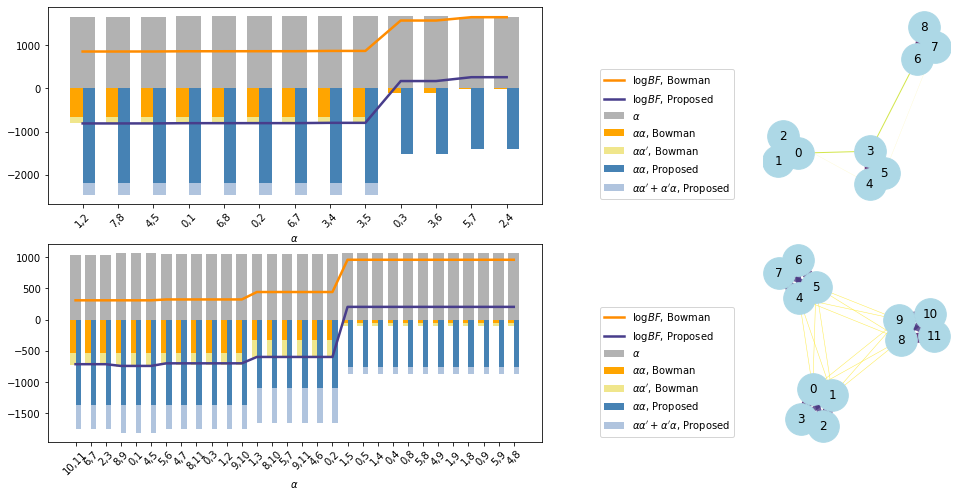

In [2]:
from BowmanModel import BowmanModel
from ThreeMacrostateModel import ThreeMacrostateModel

gridsize = (2, 10)
fig = plt.figure(figsize=(18, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=5, rowspan=1)
ax2 = plt.subplot2grid(gridsize, (1, 0), colspan=5, rowspan=1)
ax3 = plt.subplot2grid(gridsize, (0, 7), colspan=2, rowspan=1)
ax4 = plt.subplot2grid(gridsize, (1, 7), colspan=2, rowspan=1)

m = BowmanModel()
m.calc_log_BF_matrix()
C = m.C
labels, logBF_Bowman, logBF = calc_logBF_terms(C)

plot_logBF_terms(ax1, logBF_Bowman, logBF, labels)
draw_graph_cbf(m, ax3)

m3 = ThreeMacrostateModel()
m3.calc_log_BF_matrix()
C = m3.C
labels, logBF_Bowman, logBF = calc_logBF_terms(C)
plot_logBF_terms(ax2, logBF_Bowman, logBF, labels)
draw_graph_cbf(m3, ax4)

plt.savefig('figures/logBF-terms.png', dpi=200) 

# VII. Plots:  Terms in $\log BF$ while clustering

<table>
    <td> <img src='figures/logBF-terms-Bowman-clustering.png' style="width: 200px;"> </td>
    <td> <img src='figures/logBF-terms-threestate-clustering.png' style="width: 200px;"> </td>
<table>    


In [9]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from LogBF import LogBF
from LogBF import calc_C_merged, calc_state_list_merged
from LogBF import get_alpha_label

def calc_alpha_list(logBF_table):
    return [list(logBF_table[i, :2].astype(int)) for i in range(len(logBF_table))]

def calc_logBF_terms(model, bf):
    logBF_table = bf.calc_logBF_table(model.C, model.state_list, Gmethod=2)
    alpha_list = calc_alpha_list(logBF_table)
    N = model.C.sum()
    
    logBF_Bowman = []
    logBF = []
    for alpha in alpha_list:
        logBF_Bowman.append(list(bf.calc_sum_PQ_terms(model.C, alpha, Bowman=True)))
        logBF.append(list(bf.calc_sum_PQ_terms(model.C, alpha, Bowman=False)))

    labels = [get_alpha_label(model.state_list, alpha) for alpha in alpha_list]
    logBF_Bowman = N * np.array(logBF_Bowman)
    logBF = N * np.array(logBF)
    return alpha_list[0], labels, logBF_Bowman, logBF

def plot_logBF_terms(ax, logBF_Bowman, logBF, labels, legend=False):
    alpha = 1.0
    width = 0.35
    pos = np.array(range(len(labels)))
    pos_m = pos - width/2
    pos_p = pos + width/2

    ax.set_xlabel(r'$\alpha$')
    ax.set_xticks(pos)
    ax.set_xticklabels(labels, rotation=45)
    
#     ax.set_ylim(-5000, 5000)
#     ax.set_yticks([-4000, -2000, 0, 2000, 4000])

    ax.bar(pos, -logBF[:, 0], width=width*2, 
           label=r"$\alpha$", alpha=0.6, color='gray')

    ax.bar(pos_m, logBF_Bowman[:, 1], width=width, 
           label=r"$\alpha\alpha$, Bowman", 
           alpha=alpha, color='orange')

    ax.bar(pos_m, logBF_Bowman[:, 2], width=width, bottom=logBF_Bowman[:, 1], 
           label=r"$\alpha\alpha'$, Bowman", 
           alpha=alpha, color='khaki')

    ax.bar(pos_p, logBF[:, 1], width=width, 
           label=r'$\alpha\alpha$, Proposed', 
           alpha=alpha, color='steelblue')

    ax.bar(pos_p, 2*logBF[:, 2], width=width, bottom=logBF[:, 1], 
           label=r"$\alpha\alpha'+\alpha'\alpha$, Proposed", 
           alpha=alpha, color='lightsteelblue')

    total = logBF_Bowman[:, 1] + logBF_Bowman[:, 2] - logBF_Bowman[:, 0]
    ax.plot(total, linewidth=2.5, color='darkorange', label=r'$\log BF$, Bowman')
    total = logBF[:, 1] + 2*logBF[:, 2] - logBF[:, 0]
    ax.plot(total, linewidth=2.5, color='darkslateblue', label=r'$\log BF$, Proposed')

    if legend:
#         anchor_loc = (1.4, 0)
        anchor_loc = (1.3, 0)
        ax.legend(loc='lower right', bbox_to_anchor=anchor_loc)

### Clustering `BowmanModel`

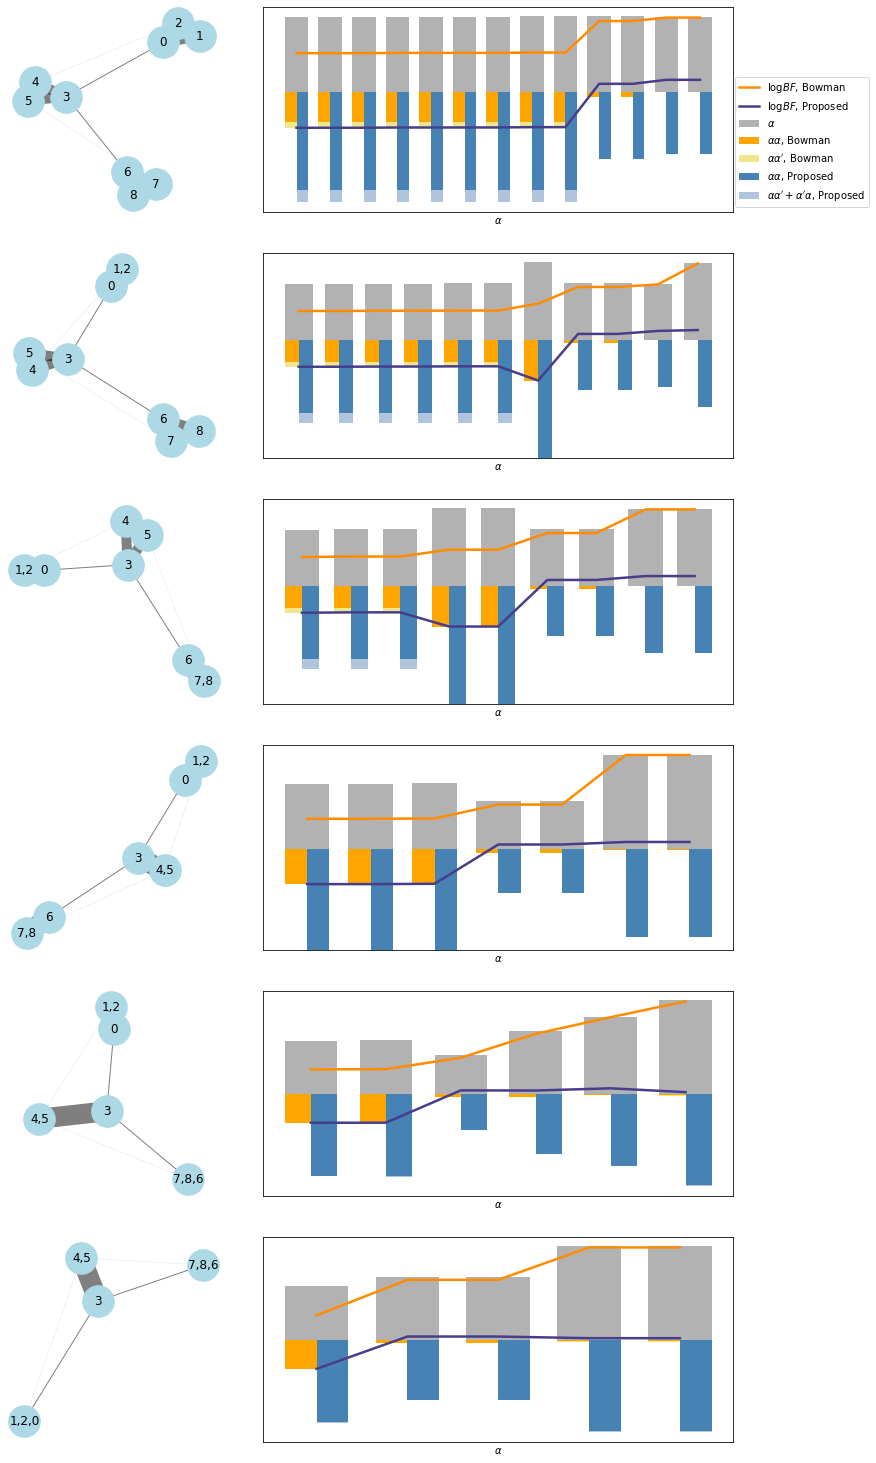

In [10]:
from BowmanModel import BowmanModel
m = BowmanModel()
bf = LogBF(m.C)

rows = 6   # number of plots
cols = 4
scale = 2.2

fig = plt.figure(figsize=(8*scale, 2*rows*scale))
grid = plt.GridSpec(rows, cols, hspace=0.2, wspace=0.2)

for i in range(rows):
    ax = [fig.add_subplot(grid[i, 0]), fig.add_subplot(grid[i, 1:3])]
    alpha, labels, logBF_Bowman, logBF = calc_logBF_terms(m, bf)
    m.draw_graph_counts_ax(ax[0])
    if i == 0: legend=True
    else:      legend=False
    plot_logBF_terms(ax[1], logBF_Bowman, logBF, labels, legend=legend)
    m.merge_states(alpha)
    
# plt.savefig('figures/logBF-terms-Bowman-clustering.png', dpi=200)

### Clustering `ThreeMacrostateModel`

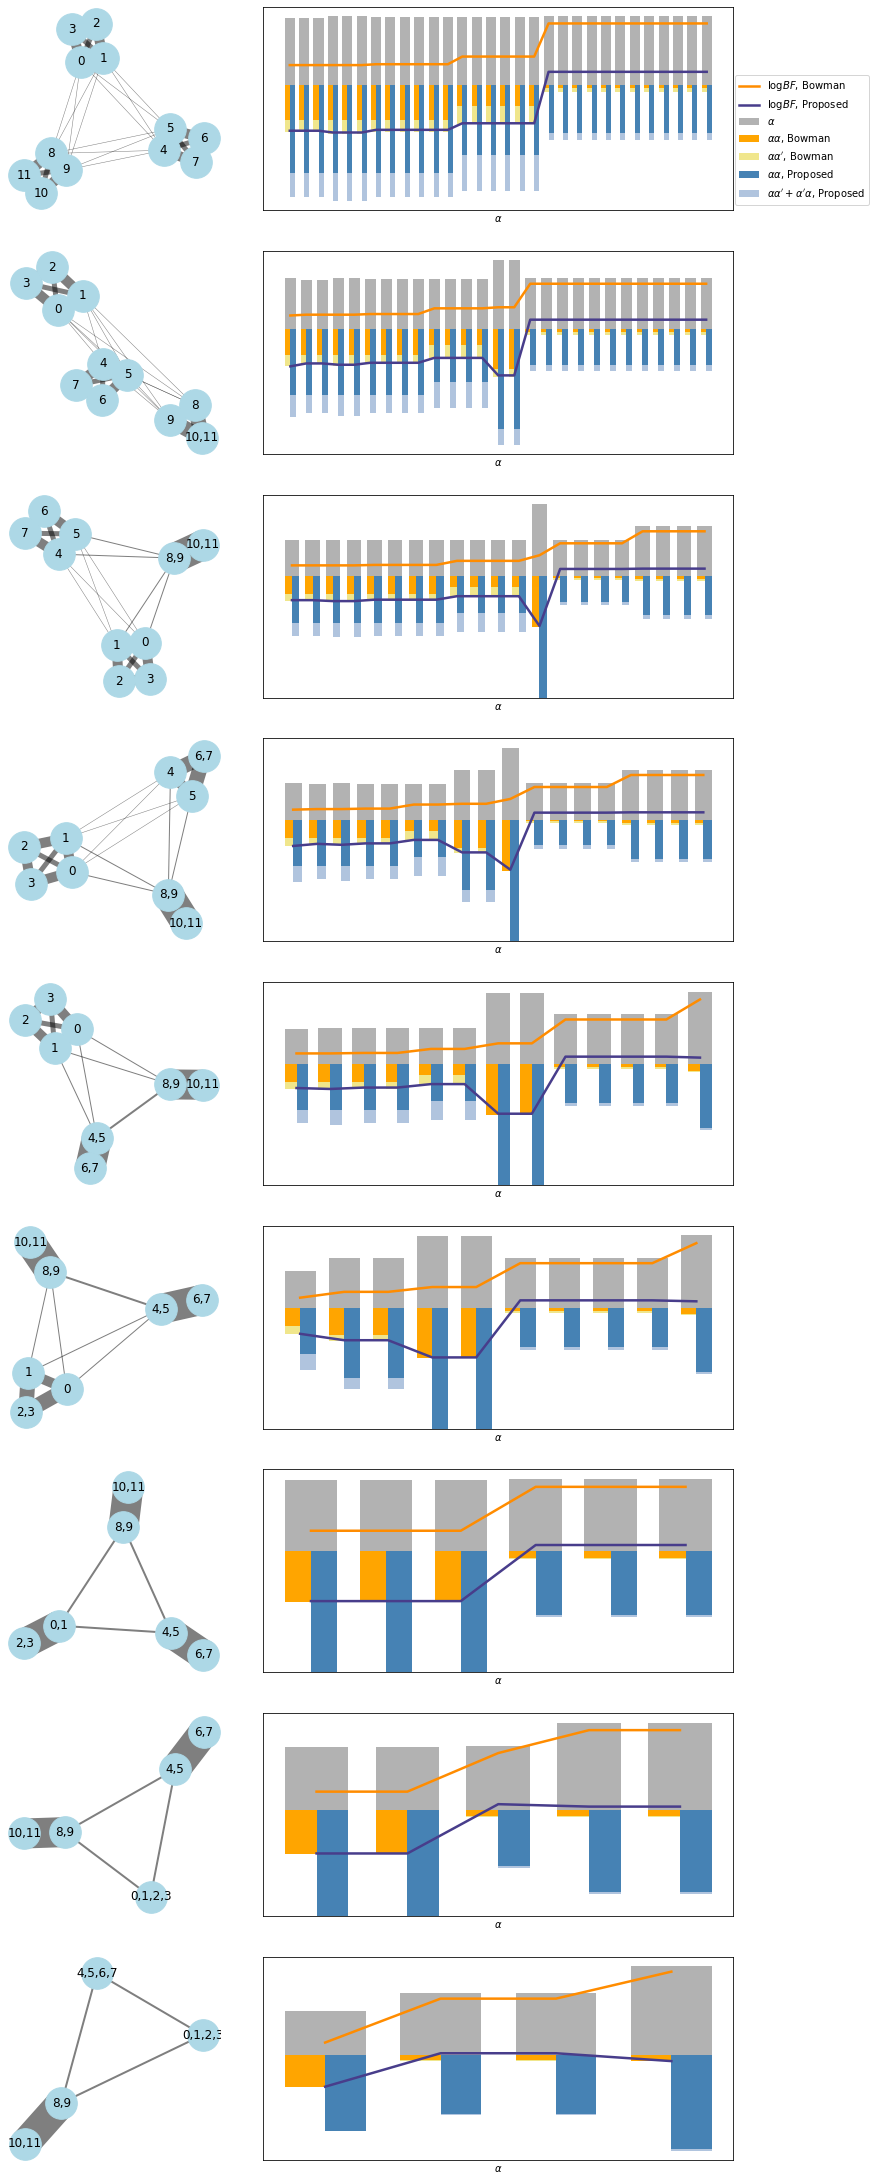

In [11]:
from ThreeMacrostateModel import ThreeMacrostateModel
m = ThreeMacrostateModel()
bf = LogBF(m.C)

rows = 9   # number of plots
cols = 4
scale = 2.2

fig = plt.figure(figsize=(8*scale, 2*rows*scale))
grid = plt.GridSpec(rows, cols, hspace=0.2, wspace=0.2)

for i in range(rows):
    ax = [fig.add_subplot(grid[i, 0]), fig.add_subplot(grid[i, 1:3])]
    alpha, labels, logBF_Bowman, logBF = calc_logBF_terms(m, bf)
    m.draw_graph_counts_ax(ax[0])
    if i == 0: legend=True
    else:      legend=False
    plot_logBF_terms(ax[1], logBF_Bowman, logBF, labels, legend=legend)
    m.merge_states(alpha)
    
# plt.savefig('figures/logBF-terms-threestate-clustering.png', dpi=200)

# Take more accurate Stirling's approximation for $\log P(C|L)$

$$
\log P(C|L) \approx \underbrace{-n^2\log n}_\mathcal{A}
+ \underbrace{\frac{n(n-1)}{2}\log(2\pi)}_\mathcal{B}
+ \frac{1}{2}\left\{ \underbrace{\sum_i\sum_j\log C_{ij}}_\mathcal{C}
- \underbrace{\sum_i\log C_i}_\mathcal{D} \right\}
+ \underbrace{\sum_i\sum_j C_{ij}\log\frac{C_{ij}}{C_i}}_\mathcal{E}
$$

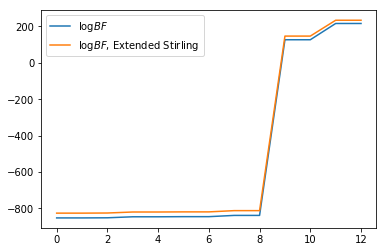

In [71]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from LogBF import LogBF
from BowmanModel import BowmanModel

def calc_A(C):
    n = C.shape[0]
    return -n**2 * np.log(n)

def calc_B(C):
    n = C.shape[0]
    return 0.5 * n * (n - 1) * np.log(2*np.pi)

def calc_C(C):
    with np.errstate(divide='ignore', invalid='ignore'):
        logC = np.log(C)
        logC[np.isneginf(logC) | np.isnan(logC)] = 0
    return np.sum(logC)

def calc_D(C):
    return np.sum(np.log(C.sum(axis=1)))

def calc_E(C):
    C = m.C
    Ci = C.sum(axis=1)
    p = C / Ci.reshape(C.shape[0], 1)
    with np.errstate(divide='ignore', invalid='ignore'):
        Clogp = C * np.log(p)
        Clogp[np.isneginf(Clogp) | np.isnan(Clogp)] = 0
    return Clogp.sum()

def calc_log_evidence_parts(C):
    results = {}
    results['A'] = calc_A(C)
    results['B'] = calc_B(C)
    results['C'] = 0.5 * calc_C(C)
    results['D'] = -0.5 * calc_D(C)
    results['E'] = calc_E(C)
    results['New'] = sum(results.values())   # High order Stirlings
    results['Old'] = results['A'] + results['E']  # Lower order
    return results

def compare_results(results, results2):
    for key in ('A', 'B', 'C', 'D', 'E', 'New', 'Old'):
        print(key, ': before', results[key])    
        print('    after ', results2[key])
        print('    change', results2[key] - results[key], '\n')

In [79]:
m = BowmanModel()
results = calc_log_evidence_parts(m.C)
results['New'], results['Old']

(-6444.435066159901, -6555.811665978547)

In [80]:
m.merge_states([0, 1])
results2 = calc_log_evidence_parts(m.C)
results2['New'], results2['Old']

(-5620.705332099022, -5709.002608459609)

In [83]:
compare_results(results, results2)

A : before -177.9751907642338
    after  -133.0842586675095
    change 44.8909320967243 

B : before 66.16357439073643
    after  51.46055785946167
    change -14.703016531274756 

C : before 77.13660061530054
    after  65.55975846457537
    change -11.57684215072517 

D : before -31.923575187390497
    after  -28.72303996344941
    change 3.2005352239410882 

E : before -6377.836475214313
    after  -5575.918349792099
    change 801.918125422214 

New : before -6444.435066159901
    after  -5620.705332099022
    change 823.7297340608793 

Old : before -6555.811665978547
    after  -5709.002608459609
    change 846.8090575189381 



In [86]:
# Check that 'Old' change (negative) is in table
#   - Old = -846.80905752
#   [   0.        ,    1.        , -846.80905752]

from LogBF import LogBF
m = BowmanModel()
bf = LogBF(m.C)
bf.calc_logBF_table(m.C, m.state_list, Fmethod=2, Gmethod=3)

array([[   1.        ,    2.        , -853.02684344],
       [   7.        ,    8.        , -853.02684344],
       [   4.        ,    5.        , -852.33348802],
       [   0.        ,    1.        , -846.80905752],
       [   6.        ,    8.        , -846.80905752],
       [   0.        ,    2.        , -846.11196144],
       [   6.        ,    7.        , -846.11196144],
       [   3.        ,    4.        , -839.23824832],
       [   3.        ,    5.        , -839.23824832],
       [   0.        ,    3.        ,  127.0757637 ],
       [   3.        ,    6.        ,  127.0757637 ],
       [   2.        ,    4.        ,  216.5514299 ],
       [   5.        ,    7.        ,  216.5514299 ]])

## `LogBFExtendedStirling`

In [135]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from LogBF import LogBF
from BowmanModel import BowmanModel

from itertools import combinations
class LogBFExtendedStirling(LogBF):
    """
    Extend the accuracy of Stirling's approximation.
    
    Usual LogBF uses :   n! ~ (n/e)**n
    Here, we extend to : n! ~ sqrt(2 pi n) * (n/e)**n
    
    Since LogBF separates the evidence into F, G terms, 
    we want to just add in corrections to those functions
    
    The log(BF) terms must be computed using 
    'calc_logBF_evidence_macrostates' ONLY!
    
    self._calc_F(n)
    self.calc_delta_F(n)
    self.calc_delta_F_prior(n)
    self.calc_logBF_evidence_macrostates(C, [i, j])
    
    """
    def calc_logBF_table(self, C, state_list, Fmethod=2, Gmethod=1):
        """
        Parameters : 
           Fmethod = 2       deltaF, no prior
                     3       deltaF, with prior

           Gmethod = 1       macrostates, using delta evidence

        Return : sorted table with rows = [i, j, logBF]
        """
        n = C.shape[0]
        if Fmethod is 2:
            dF = self.calc_delta_F(n)
        elif Fmethod is 3:
            dF = self.calc_delta_F_prior(n)
        else:
            raise RuntimeError('Fmethod must be 2 or 3')

        logBF_table = []
        for i, j in combinations(range(n), 2):
            if C[i, j] > 0:
                if Gmethod is 1:
                    dG = self.calc_logBF_evidence_macrostates(C, [i, j])
                else:
                    raise RuntimeError('Gmethod must be 1')
                    
                logBF_table.append([i, j, dF + dG])

        logBF_table = np.array(logBF_table)
        return logBF_table[logBF_table[:,2].argsort()]
    
    def calc_log_evidence_macrostates(self, C):
        le = super().calc_log_evidence_macrostates(C)
            
        # correction: 1/2 sum_ij log(C_ij)
        with np.errstate(divide='ignore', invalid='ignore'):
            logC = np.log(C)
            logC[np.isneginf(logC) | np.isnan(logC)] = 0
        le += 0.5 * np.sum(logC)
        
        # correction: -1/2 sum_i log(C_i)
        le -= 0.5 * np.sum(np.log(self.Ci))
        return le
    
    def _calc_F_correction(self, n):
        return 0.5*n*(n - 1) * np.log(2*np.pi)

    def _calc_F(self, n):
        return super()._calc_F(n) + self._calc_F_correction(n)
    
    def _calc_F_prior(self, n):
        return super()._calc_F_prior(n) + self._calc_F_correction(n)

In [136]:
m = BowmanModel()
bf = LogBF(m.C)
bfx = LogBFExtendedStirling(m.C)

bf.calc_log_evidence_macrostates(m.C), \
bfx.calc_log_evidence_macrostates(m.C)

(-6377.836475214313, -6332.623449786403)

### Checking out evidence terms

In [153]:
n = m.C.shape[0]
bf._calc_F(n), bfx._calc_F(n)

(-177.9751907642338, -111.81161637349736)

In [154]:
bf._calc_F_prior(n), bfx._calc_F_prior(n)

(23648.72812586973, 23714.891700260465)

In [155]:
bf.calc_delta_F(n), bfx.calc_delta_F(n)

(-44.8909320967243, -30.187915565449543)

In [156]:
bf.calc_logBF_evidence_macrostates(m.C, [0, 1]), \
bfx.calc_logBF_evidence_macrostates(m.C, [0, 1])

(-801.918125422214, -790.3412832714894)

### Checking $\log BF$ tables

In [157]:
bftab = bf.calc_logBF_table(m.C, m.state_list, Fmethod=2, Gmethod=1)
bftab

array([[   1.        ,    2.        , -853.02684344],
       [   7.        ,    8.        , -853.02684344],
       [   4.        ,    5.        , -852.33348802],
       [   0.        ,    1.        , -846.80905752],
       [   6.        ,    8.        , -846.80905752],
       [   0.        ,    2.        , -846.11196144],
       [   6.        ,    7.        , -846.11196144],
       [   3.        ,    4.        , -839.23824832],
       [   3.        ,    5.        , -839.23824832],
       [   0.        ,    3.        ,  127.0757637 ],
       [   3.        ,    6.        ,  127.0757637 ],
       [   2.        ,    4.        ,  216.5514299 ],
       [   5.        ,    7.        ,  216.5514299 ]])

In [158]:
bfxtab = bfx.calc_logBF_table(m.C, m.state_list, Fmethod=2, Gmethod=1)
bfxtab

array([[   1.        ,    2.        , -826.74698476],
       [   7.        ,    8.        , -826.74698476],
       [   4.        ,    5.        , -826.05362933],
       [   0.        ,    1.        , -820.52919884],
       [   6.        ,    8.        , -820.52919884],
       [   0.        ,    2.        , -819.83210276],
       [   6.        ,    7.        , -819.83210276],
       [   3.        ,    4.        , -812.95838964],
       [   3.        ,    5.        , -812.95838964],
       [   0.        ,    3.        ,  147.18369421],
       [   3.        ,    6.        ,  147.18369421],
       [   2.        ,    4.        ,  234.36125073],
       [   5.        ,    7.        ,  234.36125073]])

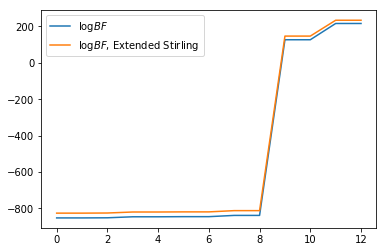

In [162]:
x = range(bftab.shape[0])
plt.plot(x, bftab[:, 2], label=r'$\log BF$')
plt.plot(x, bfxtab[:, 2], label=r'$\log BF$, Extended Stirling')
plt.legend()